In [25]:
# Dependencies
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt

In [27]:
# Study data files
walmart_path = "data/Walmart.csv"

# Read the Walmart data
walmart_data = pd.read_csv(walmart_path)

# Display the data table for preview
walmart_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [29]:
# Standardize column names
walmart_data.rename(columns={"Store":"Store ID", "Temperature":"Avg Temperature (℉)", "CPI": "Customer Price Index", 
                             "Unemployment": "Unemployment Rate "}, inplace=True)

walmart_data
                   

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Customer Price Index,Unemployment Rate
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [31]:
#De
walmart_data.describe()

,Store ID,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Customer Price Index,Unemployment Rate
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [33]:
# Add an empty column for the holidays 
bins =[0, 1000000.00, 1500000.00, walmart_data['Weekly_Sales'].max()]
labels = ['Low', 'Medium', 'High']

walmart_data['Sales_Category'] = pd.cut(walmart_data['Weekly_Sales'],bins, labels=labels)
walmart_data.tail(100)

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Customer Price Index,Unemployment Rate,Sales_Category
6335,45,03-12-2010,879244.90,0,40.93,3.046,182.667615,8.724,Low
6336,45,10-12-2010,1002364.34,0,30.54,3.109,182.551954,8.724,Medium
6337,45,17-12-2010,1123282.85,0,30.51,3.140,182.517732,8.724,Medium
6338,45,24-12-2010,1682862.03,0,30.59,3.141,182.544590,8.724,High
6339,45,31-12-2010,679156.20,1,29.67,3.179,182.571448,8.724,Low
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Low
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Low
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Low
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Low


In [35]:
# Check for data description
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Store ID              6435 non-null   int64   
 1   Date                  6435 non-null   object  
 2   Weekly_Sales          6435 non-null   float64 
 3   Holiday_Flag          6435 non-null   int64   
 4   Avg Temperature (℉)   6435 non-null   float64 
 5   Fuel_Price            6435 non-null   float64 
 6   Customer Price Index  6435 non-null   float64 
 7   Unemployment Rate     6435 non-null   float64 
 8   Sales_Category        6435 non-null   category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 408.7+ KB


In [37]:
# Check for missing values 
walmart_data.isnull().sum()

Store ID                0
Date                    0
Weekly_Sales            0
Holiday_Flag            0
Avg Temperature (℉)     0
Fuel_Price              0
Customer Price Index    0
Unemployment Rate       0
Sales_Category          0
dtype: int64

In [39]:
# Check for unique values
walmart_data.nunique()

Store ID                  45
Date                     143
Weekly_Sales            6435
Holiday_Flag               2
Avg Temperature (℉)     3528
Fuel_Price               892
Customer Price Index    2145
Unemployment Rate        349
Sales_Category             3
dtype: int64

In [41]:
# Check for duplicates values
walmart_data.duplicated().sum()

0

In [43]:
walmart_data

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Customer Price Index,Unemployment Rate,Sales_Category
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,High
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,High
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,High
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Medium
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,High
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Low
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Low
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Low
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Low


In [45]:
walmart_data['Holiday_Flag'] =walmart_data['Holiday_Flag'].astype(int)
walmart_data['Holiday_Flag']=walmart_data['Holiday_Flag'].map({0:'None Holiday', 1: 'Holiday'})
walmart_data.head(50)

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Customer Price Index,Unemployment Rate,Sales_Category
0,1,05-02-2010,1643690.90,None Holiday,42.31,2.572,211.096358,8.106,High
1,1,12-02-2010,1641957.44,Holiday,38.51,2.548,211.242170,8.106,High
2,1,19-02-2010,1611968.17,None Holiday,39.93,2.514,211.289143,8.106,High
3,1,26-02-2010,1409727.59,None Holiday,46.63,2.561,211.319643,8.106,Medium
4,1,05-03-2010,1554806.68,None Holiday,46.50,2.625,211.350143,8.106,High
5,1,12-03-2010,1439541.59,None Holiday,57.79,2.667,211.380643,8.106,Medium
6,1,19-03-2010,1472515.79,None Holiday,54.58,2.720,211.215635,8.106,Medium
7,1,26-03-2010,1404429.92,None Holiday,51.45,2.732,211.018042,8.106,Medium
8,1,02-04-2010,1594968.28,None Holiday,62.27,2.719,210.820450,7.808,High
9,1,09-04-2010,1545418.53,None Holiday,65.86,2.770,210.622857,7.808,High


In [47]:
sale_summary =walmart_data.groupby("Store ID").agg({'Weekly_Sales':['sum','mean','max', 'min']}).reset_index()

#Print summary
sale_summary

Store ID  Weekly_Sales                                      
                      sum          mean         max         min
0         1  2.224028e+08  1.555264e+06  2387950.20  1316899.31
1         2  2.753824e+08  1.925751e+06  3436007.68  1650394.44
2         3  5.758674e+07  4.027044e+05   605990.41   339597.38
3         4  2.995440e+08  2.094713e+06  3676388.98  1762539.30
4         5  4.547569e+07  3.180118e+05   507900.07   260636.71
5         6  2.237561e+08  1.564728e+06  2727575.18  1261253.18
6         7  8.159828e+07  5.706173e+05  1059715.27   372673.61
7         8  1.299512e+08  9.087495e+05  1511641.09   772539.12
8         9  7.778922e+07  5.439806e+05   905324.68   452905.22
9        10  2.716177e+08  1.899425e+06  3749057.69  1627707.31
10       11  1.939628e+08  1.356383e+06  2306265.36  1100418.69
11       12  1.442872e+08  1.009002e+06  1768249.89   802105.50
12       13  2.865177e+08  2.003620e+06  3595903.20  1633663.12
13       14  2.889999e+08  2.020978e+06  3818686.45  1479514.66
14       15  8.913368e+07  6.233125e+05  1368318.17   454183.42
15       16  7.425243e+07  5.192477e+05  1004730.69   368600.00
16       17  1.277821e+08  8.935814e+05  1309226.79   635862.55
17       18  1.551147e+08  1.084718e+06  2027507.15   540922.94
18       19  2.066349e+08  1.444999e+06  2678206.42  1181204.53
19       20  3.013978e+08  2.107677e+06  3766687.43  1761016.51
20       21  1.081179e+08  7.560691e+05  1587257.78   596218.24
21       22  1.470756e+08  1.028501e+06  1962445.04   774262.28
22       23  1.987506e+08  1.389864e+06  2734277.10  1016756.10
23       24  1.940160e+08  1.356755e+06  2386015.75  1057290.41
24       25  1.010612e+08  7.067215e+05  1295391.19   558794.63
25       26  1.434164e+08  1.002912e+06  1573982.47   809833.21
26       27  2.538559e+08  1.775216e+06  3078162.08  1263534.86
27       28  1.892637e+08  1.323522e+06  2026026.39  1079669.11
28       29  7.714155e+07  5.394514e+05  1130926.79   395987.24
29       30  6.271689e+07  4.385796e+05   519354.88   369722.32
30       31  1.996139e+08  1.395901e+06  2068942.97  1198071.60
31       32  1.668192e+08  1.166568e+06  1959526.96   955463.84
32       33  3.716022e+07  2.598617e+05   331173.51   209986.25
33       34  1.382498e+08  9.667816e+05  1620748.25   836717.75
34       35  1.315207e+08  9.197250e+05  1781866.98   576332.05
35       36  5.341221e+07  3.735120e+05   489372.02   270677.98
36       37  7.420274e+07  5.189003e+05   605791.46   451327.61
37       38  5.515963e+07  3.857317e+05   499267.66   303908.81
38       39  2.074455e+08  1.450668e+06  2554482.84  1158698.44
39       40  1.378703e+08  9.641280e+05  1648829.18   764014.75
40       41  1.813419e+08  1.268125e+06  2263722.68   991941.73
41       42  7.956575e+07  5.564039e+05   674919.45   428953.60
42       43  9.056544e+07  6.333247e+05   725043.04   505405.85
43       44  4.329309e+07  3.027489e+05   376233.89   241937.11
44       45  1.123953e+08  7.859814e+05  1682862.03   617207.58

In [49]:
#Rename columns 
sale_summary.columns=['Store ID','Total Sales','Average Weekly Sales','Highest Weekly Sales', 'Lowest Weekly Sales']

#Print Summary
sale_summary

,Store ID,Total Sales,Average Weekly Sales,Highest Weekly Sales,Lowest Weekly Sales
0,1,2.224028e+08,1.555264e+06,2387950.20,1316899.31
1,2,2.753824e+08,1.925751e+06,3436007.68,1650394.44
2,3,5.758674e+07,4.027044e+05,605990.41,339597.38
3,4,2.995440e+08,2.094713e+06,3676388.98,1762539.30
4,5,4.547569e+07,3.180118e+05,507900.07,260636.71
5,6,2.237561e+08,1.564728e+06,2727575.18,1261253.18
6,7,8.159828e+07,5.706173e+05,1059715.27,372673.61
7,8,1.299512e+08,9.087495e+05,1511641.09,772539.12
8,9,7.778922e+07,5.439806e+05,905324.68,452905.22
9,10,2.716177e+08,1.899425e+06,3749057.69,1627707.31


In [51]:
#Data Analysis

In [ ]:
#Data Visualization with Mathplolib or Pandas (6-8) figures

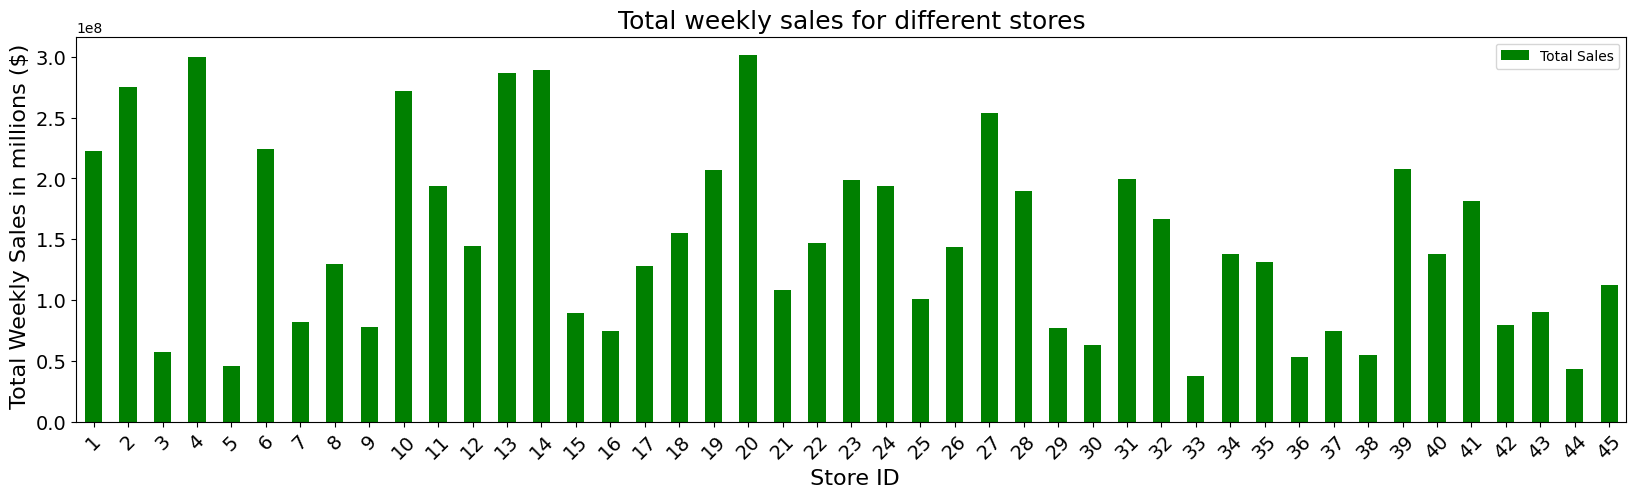

In [53]:
# Bar graph for total sales per store
sale_summary.plot (x='Store ID', y='Total Sales', kind ='bar', figsize = (20, 5), color = "green", fontsize= 14)
plt.xticks(rotation= 45)
plt.title("Total weekly sales for different stores", fontsize= 18)
plt.xlabel(" Store ID", fontsize= 16)
plt.ylabel (" Total Weekly Sales in millions ($)", fontsize= 16)

#print figure make a folder and export all the graphs as png
plt.show()

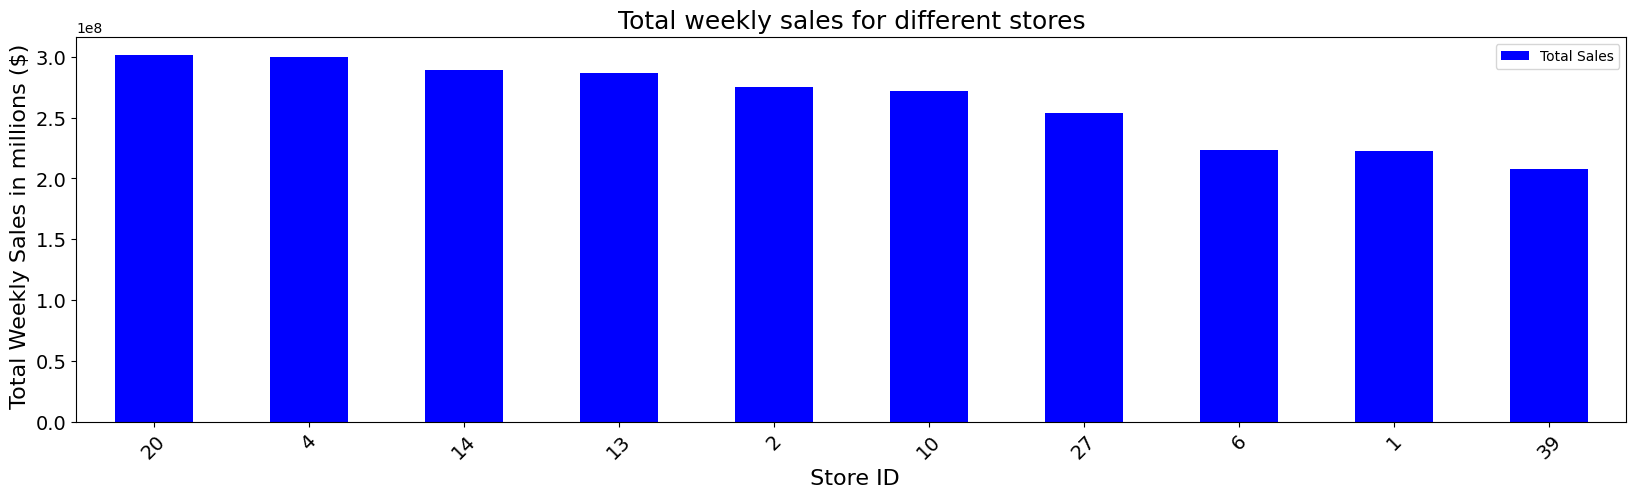

In [55]:
#Top ten stores based on total sales
top_stores = sale_summary.sort_values(by='Total Sales', ascending=False).head(10)

#Make a bar graph for the top stores
top_stores.plot (x='Store ID', y='Total Sales', kind ='bar', figsize = (20, 5), color = "blue", fontsize= 14)
plt.xticks(rotation= 45)
plt.title("Total weekly sales for different stores", fontsize= 18)
plt.xlabel(" Store ID", fontsize= 16)
plt.ylabel (" Total Weekly Sales in millions ($)", fontsize= 16)

#print figure make a folder and export all the graphs as png
plt.show()

In [107]:
month_df= walmart_data["Date"].str.split('-').str[1]
walmart_data["Month"] = month_df

walmart_data

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Customer Price Index,Unemployment Rate,Sales_Category,Month
0,1,05-02-2010,1643690.90,None Holiday,42.31,2.572,211.096358,8.106,High,02
1,1,12-02-2010,1641957.44,Holiday,38.51,2.548,211.242170,8.106,High,02
2,1,19-02-2010,1611968.17,None Holiday,39.93,2.514,211.289143,8.106,High,02
3,1,26-02-2010,1409727.59,None Holiday,46.63,2.561,211.319643,8.106,Medium,02
4,1,05-03-2010,1554806.68,None Holiday,46.50,2.625,211.350143,8.106,High,03
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,None Holiday,64.88,3.997,192.013558,8.684,Low,09
6431,45,05-10-2012,733455.07,None Holiday,64.89,3.985,192.170412,8.667,Low,10
6432,45,12-10-2012,734464.36,None Holiday,54.47,4.000,192.327265,8.667,Low,10
6433,45,19-10-2012,718125.53,None Holiday,56.47,3.969,192.330854,8.667,Low,10


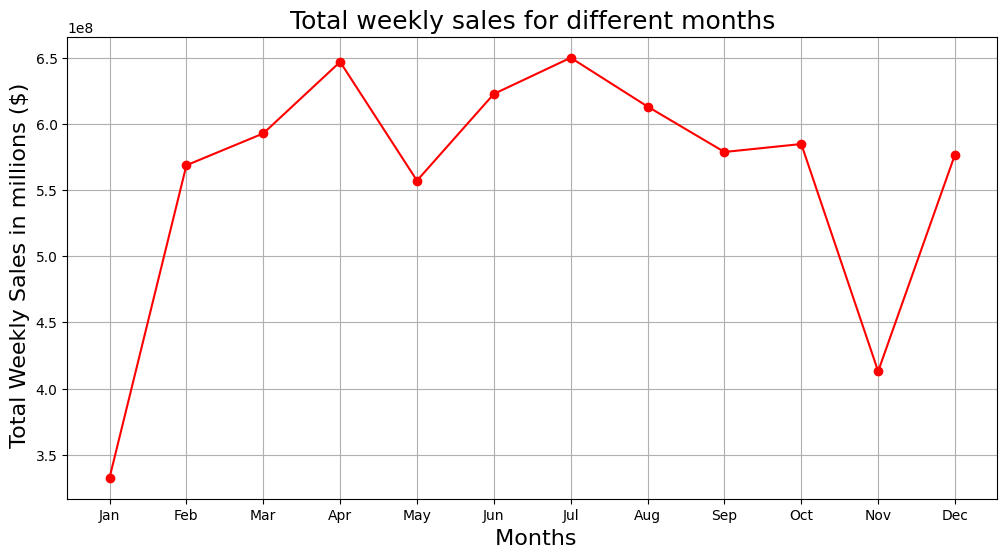

In [73]:
#Line graph of Total sales in different months
monthly_sales = walmart_data.groupby('Month')['Weekly_Sales'].sum()

monthly_sales.plot (kind= 'line', color= 'red', figsize = (12, 6), marker= 'o')
plt.xticks(range(0,12),["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"])
plt.title("Total weekly sales for different months", fontsize= 18)
plt.grid()
plt.xlabel(" Months", fontsize= 16)
plt.ylabel (" Total Weekly Sales in millions ($)", fontsize= 16)

#print figure make a folder and export all the graphs as png
plt.show()

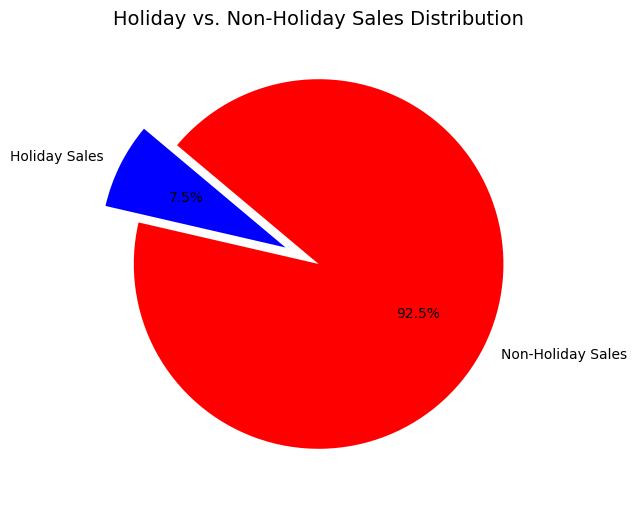

In [89]:
# Aggregate sales by holiday flag
sales_summary = walmart_data.groupby("Holiday_Flag")["Weekly_Sales"].sum()

# Labels for the pie chart
labels = ["Holiday Sales", "Non-Holiday Sales"]
explode= (0.2, 0)
# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sales_summary, labels=labels, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140, explode=explode)
plt.title("Holiday vs. Non-Holiday Sales Distribution", fontsize=14)
plt.show()

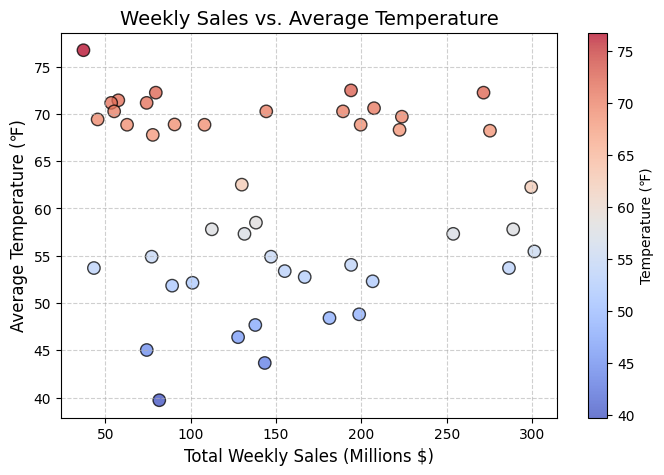

In [123]:
x = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
y = walmart_data.groupby("Store ID")["Avg Temperature (℉)"].mean()

plt.figure(figsize=(8, 5))  # Set figure size
plt.scatter(x, y, c=y, cmap="coolwarm", edgecolor='black', alpha=0.75, s=80)

plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Average Temperature", fontsize=14)
plt.xlabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.ylabel("Average Temperature (℉)", fontsize=12)

plt.colorbar(label="Temperature (℉)")  # Add a color bar
plt.show()

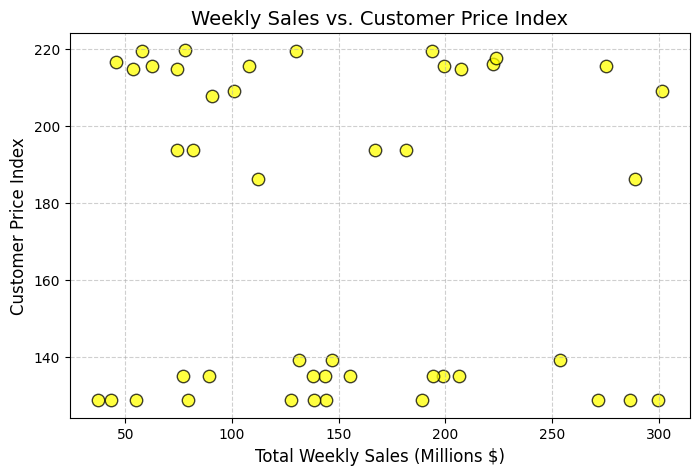

In [147]:
x = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
y = walmart_data.groupby("Store ID")["Customer Price Index"].mean()

plt.figure(figsize=(8, 5))  # Set figure size
plt.scatter(x, y, color= 'yellow', edgecolor='black', alpha=0.75, s=80)

plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Customer Price Index", fontsize=14)
plt.xlabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.ylabel("Customer Price Index", fontsize=12)

plt.show()

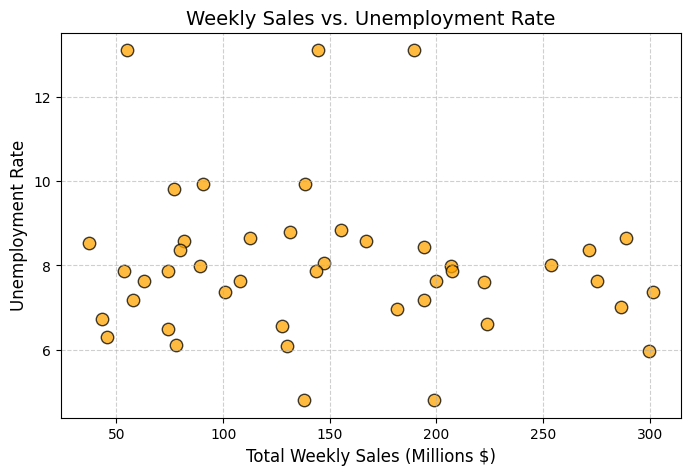

In [119]:
x = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
y = walmart_data.groupby("Store ID")["Unemployment Rate "].mean()

plt.figure(figsize=(8, 5))  # Set figure size
plt.scatter(x, y, color="orange", edgecolor='black', alpha=0.75, s=80)

plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Unemployment Rate", fontsize=14)
plt.xlabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.ylabel("Unemployment Rate", fontsize=12)

plt.show()

In [ ]:
x = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
y = walmart_data.groupby("Store ID")["Unemployment Rate "].mean()

plt.figure(figsize=(8, 5))  # Set figure size
plt.scatter(x, y, color="orange", edgecolor='black', alpha=0.75, s=80)

plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Unemployment Rate", fontsize=14)
plt.xlabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.ylabel("Unemployment Rate", fontsize=12)

plt.show()

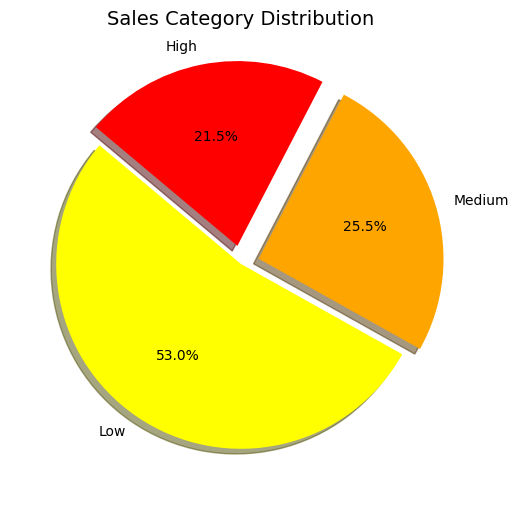

In [143]:
# Count occurrences of each sales category
sales_category = walmart_data["Sales_Category"].value_counts()

# Labels should match unique categories
labels = sales_category.index

# Define colors (optional)
colors = ['yellow', 'orange', 'red']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sales_category, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0, 0.1, 0.1], shadow= True)

plt.title("Sales Category Distribution", fontsize=14)
plt.show()

In [ ]:
Summary our findinds